In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
import zipfile
import os
import pyreadstat
import os

zip_path = r"2025\Microdata for Demographic and Health Survey 20219-2020 (2).zip"
extract_path = r"2025\dhs_data"


with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_path)


for root, dirs, files in os.walk(extract_path):
    for f in files:
        print(os.path.join(root, f))


2025\dhs_data\Microdata\RWBR81FL.DTA
2025\dhs_data\Microdata\RWCR81FL.DTA
2025\dhs_data\Microdata\RWFW81FL.DTA
2025\dhs_data\Microdata\RWHR81FL.DTA
2025\dhs_data\Microdata\RWIR81FL.DTA
2025\dhs_data\Microdata\RWKR81FL.DTA
2025\dhs_data\Microdata\RWMR81FL.DTA
2025\dhs_data\Microdata\RWPR81FL.DTA


In [12]:



base_path = r"C:\Users\user\Desktop\NISR\2025\dhs_data\Microdata"


file_paths = [
    os.path.join(base_path, "RWIR81FL.DTA"),  # Individual Recode (main focus)
    os.path.join(base_path, "RWBR81FL.DTA"),  # Births recode
    os.path.join(base_path, "RWMR81FL.DTA"),  # Men’s recode
    os.path.join(base_path, "RWKR81FL.DTA"),  # Children’s recode
    os.path.join(base_path, "RWHR81FL.DTA"),  # Household recode
    os.path.join(base_path, "RWPR81FL.DTA"),  # Household member recode
    os.path.join(base_path, "RWCR81FL.DTA"),  # Couple’s recode
    os.path.join(base_path, "RWFW81FL.DTA")   # Female recode
]


for path in file_paths:
    try:
        df, meta = pyreadstat.read_dta(path)
        print("📁 File:", path)
        print("   Shape:", df.shape)
        print("   First 30 columns:", df.columns.tolist()[:30], "\n")
    except Exception as e:
        print("⚠️ Could not read:", path, "| Error:", e)


📁 File: C:\Users\user\Desktop\NISR\2025\dhs_data\Microdata\RWIR81FL.DTA
   Shape: (14634, 5117)
   First 30 columns: ['caseid', 'v000', 'v001', 'v002', 'v003', 'v004', 'v005', 'v006', 'v007', 'v008', 'v008a', 'v009', 'v010', 'v011', 'v012', 'v013', 'v014', 'v015', 'v016', 'v017', 'v018', 'v019', 'v019a', 'v020', 'v021', 'v022', 'v023', 'v024', 'v025', 'v026'] 

📁 File: C:\Users\user\Desktop\NISR\2025\dhs_data\Microdata\RWBR81FL.DTA
   Shape: (30820, 1216)
   First 30 columns: ['caseid', 'bidx', 'v000', 'v001', 'v002', 'v003', 'v004', 'v005', 'v006', 'v007', 'v008', 'v008a', 'v009', 'v010', 'v011', 'v012', 'v013', 'v014', 'v015', 'v016', 'v017', 'v018', 'v019', 'v019a', 'v020', 'v021', 'v022', 'v023', 'v024', 'v025'] 

📁 File: C:\Users\user\Desktop\NISR\2025\dhs_data\Microdata\RWMR81FL.DTA
   Shape: (6513, 808)
   First 30 columns: ['mcaseid', 'mv000', 'mv001', 'mv002', 'mv003', 'mv004', 'mv005', 'mv006', 'mv007', 'mv008', 'mv008a', 'mv009', 'mv010', 'mv011', 'mv012', 'mv013', 'mv014', 

In [18]:
# Path to  DHS Individual Recode dataset (.DTA file)
file_path = r"C:\Users\user\Desktop\NISR\2025\dhs_data\Microdata\RWIR81FL.DTA"

# Load dataset
df, meta = pyreadstat.read_dta(file_path)

# Select a subset of key columns (adjust based on your dataset)
cols = ['v012','v013','v024','v025','v106','v113','v116',
        'v119','v120','v121','v122','v190','v445']

df_small = df[cols].copy()

# Rename columns for clarity
df_small.rename(columns={
    'v012': 'age',
    'v013': 'age_group',
    'v024': 'region',
    'v025': 'residence',
    'v106': 'education_level',
    'v113': 'water_source',
    'v116': 'toilet_type',
    'v119': 'has_electricity',
    'v120': 'has_radio',
    'v121': 'has_tv',
    'v122': 'has_fridge',
    'v190': 'wealth_index',
    'v445': 'bmi_x100'
}, inplace=True)

# Convert BMI from x100 to normal
df_small['bmi'] = df_small['bmi_x100'] / 100
df_small.drop(columns='bmi_x100', inplace=True)

# Quick overview
print(df_small.info())
print(df_small.describe(include='all'))
print(df_small.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14634 entries, 0 to 14633
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              14634 non-null  int64 
 1   age_group        14634 non-null  int64 
 2   region           14634 non-null  int64 
 3   residence        14634 non-null  int64 
 4   education_level  14634 non-null  int64 
 5   water_source     14634 non-null  int64 
 6   toilet_type      14634 non-null  int64 
 7   has_electricity  14634 non-null  int64 
 8   has_radio        14634 non-null  int64 
 9   has_tv           14634 non-null  int64 
 10  has_fridge       14634 non-null  int64 
 11  wealth_index     14634 non-null  int64 
 12  bmi              7299 non-null   object
dtypes: int64(12), object(1)
memory usage: 1.5+ MB
None
                 age     age_group        region     residence  \
count   14634.000000  14634.000000  14634.000000  14634.000000   
unique           NaN        

In [16]:
# Convert bmi column to numeric
df_small['bmi'] = pd.to_numeric(df_small['bmi'], errors='coerce')

# Quick check after conversion
print(df_small['bmi'].describe())


count    7299.000000
mean       23.384061
std         3.924506
min        12.870000
25%        20.810000
50%        22.730000
75%        25.250000
max        50.610000
Name: bmi, dtype: float64


In [19]:
df_small['bmi'] = pd.to_numeric(df_small['bmi'], errors='coerce')


In [20]:
binary_cols = ['has_electricity','has_radio','has_tv','has_fridge']
for col in binary_cols:
    df_small[col] = df_small[col].apply(lambda x: 1 if x == 1 else 0)


In [21]:
print(df_small.info())
print(df_small.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14634 entries, 0 to 14633
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              14634 non-null  int64  
 1   age_group        14634 non-null  int64  
 2   region           14634 non-null  int64  
 3   residence        14634 non-null  int64  
 4   education_level  14634 non-null  int64  
 5   water_source     14634 non-null  int64  
 6   toilet_type      14634 non-null  int64  
 7   has_electricity  14634 non-null  int64  
 8   has_radio        14634 non-null  int64  
 9   has_tv           14634 non-null  int64  
 10  has_fridge       14634 non-null  int64  
 11  wealth_index     14634 non-null  int64  
 12  bmi              7299 non-null   float64
dtypes: float64(1), int64(12)
memory usage: 1.5 MB
None
                age     age_group        region     residence  \
count  14634.000000  14634.000000  14634.000000  14634.000000   
mean      29.13

In [22]:
import pandas as pd

# Create a column indicating whether BMI is missing
df_small['bmi_missing'] = df_small['bmi'].isna()

# Check missing BMI by region
missing_by_region = df_small.groupby('region')['bmi_missing'].mean() * 100
print("Percentage of missing BMI by region:")
print(missing_by_region)

# Check missing BMI by age group
missing_by_age = df_small.groupby('age_group')['bmi_missing'].mean() * 100
print("\nPercentage of missing BMI by age group:")
print(missing_by_age)

# Check missing BMI by residence (urban/rural)
missing_by_residence = df_small.groupby('residence')['bmi_missing'].mean() * 100
print("\nPercentage of missing BMI by residence:")
print(missing_by_residence)


Percentage of missing BMI by region:
region
1    50.963040
2    49.971281
3    49.456522
4    50.741064
5    50.041379
Name: bmi_missing, dtype: float64

Percentage of missing BMI by age group:
age_group
1    49.516324
2    52.681518
3    50.512946
4    47.971360
5    50.807636
6    50.100874
7    48.617886
Name: bmi_missing, dtype: float64

Percentage of missing BMI by residence:
residence
1    49.929597
2    50.184968
Name: bmi_missing, dtype: float64


In [49]:

# Create a new column indicating undernutrition (BMI < 18.5)
df_small['undernutrition'] = df_small['bmi'] < 18.5

# Group by region and calculate undernutrition rate
undernutrition_by_region = df_small.groupby('region')['undernutrition'].mean().reset_index()

# Rename columns for clarity
undernutrition_by_region.rename(columns={'undernutrition': 'undernutrition_rate'}, inplace=True)

# Display results
print(undernutrition_by_region)


   region  undernutrition_rate
0       1             0.020822
1       2             0.043940
2       3             0.029589
3       4             0.020052
4       5             0.023448


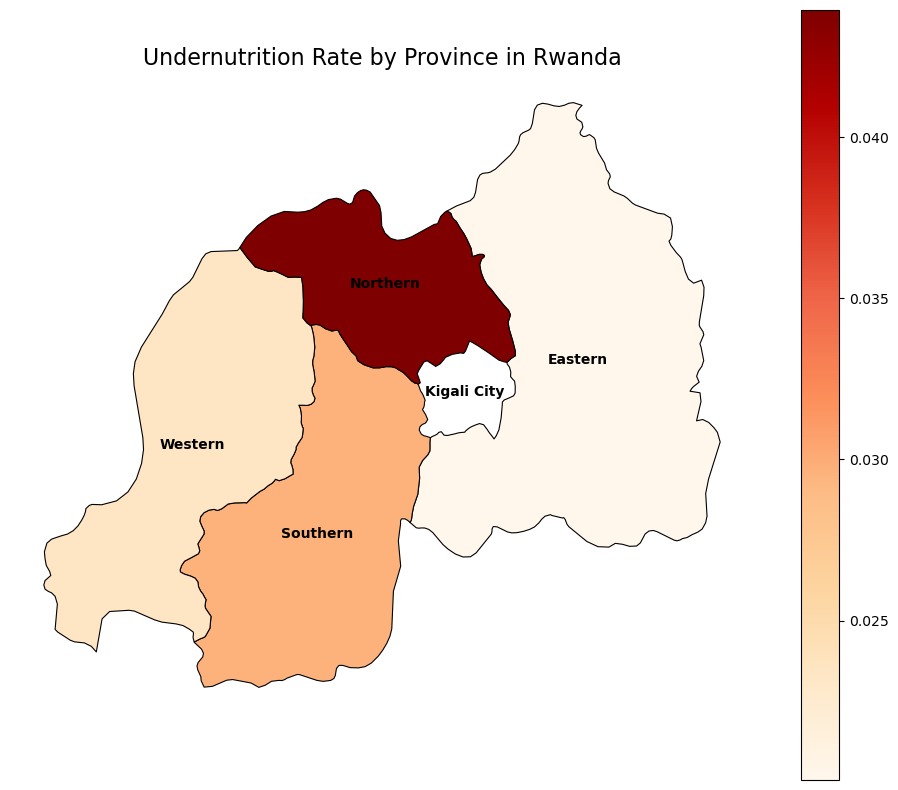

In [103]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# 1. Load Rwanda provinces shapefile
# -------------------------------
shapefile_path = r"C:\Users\user\Desktop\NISR\2025\ne_10m_admin_1_states_provinces.zip"
gdf = gpd.read_file(f"zip://{shapefile_path}")

# Filter only Rwanda
gdf_rwa = gdf[gdf['iso_a2'] == 'RW']

# -------------------------------
# 2. Province-level undernutrition data
# -------------------------------
undernutrition_by_province = pd.DataFrame({
    'province': ['Eastern', 'Kigali', 'Northern', 'Southern', 'Western'],
    'undernutrition_rate': [0.020052, 0.020822, 0.043940, 0.029589, 0.023448]
})

# Merge shapefile with undernutrition data
gdf_rwa = gdf_rwa.merge(
    undernutrition_by_province,
    left_on='name',  # shapefile province name
    right_on='province',
    how='left'
)

# -------------------------------
# 3. Project to metric CRS for plotting
# -------------------------------
gdf_rwa = gdf_rwa.to_crs(epsg=32635)  # UTM zone 35N
gdf_rwa['centroid'] = gdf_rwa.geometry.centroid

# -------------------------------
# 4. Plot choropleth
# -------------------------------
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Color provinces by undernutrition rate
gdf_rwa.plot(
    column='undernutrition_rate',
    ax=ax,
    legend=True,
    cmap='OrRd',
    edgecolor='black',
    linewidth=0.8
)

# Add province labels
for idx, row in gdf_rwa.iterrows():
    ax.text(
        row['centroid'].x, row['centroid'].y,
        row['name'],
        fontsize=10,
        ha='center',
        va='center',
        fontweight='bold'
    )

# Title and remove axes
ax.set_title('Undernutrition Rate by Province in Rwanda', fontsize=16)
ax.axis('off')

plt.show()


In [111]:
print(df_small.columns)


Index(['age', 'age_group', 'region', 'residence', 'education_level',
       'water_source', 'toilet_type', 'has_electricity', 'has_radio', 'has_tv',
       'has_fridge', 'wealth_index', 'bmi', 'bmi_missing', 'undernourished',
       'undernutrition', 'province'],
      dtype='object')


Check malnutrition prevalence

In [113]:
# Overall undernutrition rate
overall_rate = df_small['undernourished'].mean()
print(f"Overall undernutrition rate: {overall_rate:.2%}")

# By province
province_rate = df_small.groupby('province')['undernourished'].mean().sort_values(ascending=False)
print(province_rate)

# By age group
age_rate = df_small.groupby('age_group')['undernourished'].mean()
print(age_rate)


Overall undernutrition rate: 2.88%
province
Northern    0.043940
Southern    0.029589
Western     0.023448
Kigali      0.020822
Eastern     0.020052
Name: undernourished, dtype: float64
age_group
1    0.053507
2    0.017327
3    0.017587
4    0.015752
5    0.018111
6    0.023537
7    0.050407
Name: undernourished, dtype: float64


Check undernutrition by wealth, education, and residence

In [114]:
# By wealth index
wealth_rate = df_small.groupby('wealth_index')['undernourished'].mean()
print(wealth_rate)

# By education level
edu_rate = df_small.groupby('education_level')['undernourished'].mean()
print(edu_rate)

# By urban/rural residence
res_rate = df_small.groupby('residence')['undernourished'].mean()
print(res_rate)


wealth_index
1    0.036920
2    0.036941
3    0.029162
4    0.027393
5    0.016905
Name: undernourished, dtype: float64
education_level
0    0.033284
1    0.027412
2    0.031630
3    0.020833
Name: undernourished, dtype: float64
residence
1    0.019431
2    0.031851
Name: undernourished, dtype: float64


In [132]:
# Define malnutrition categories based on BMI
def malnutrition_status(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Create a new column
df_small['malnutrition_status'] = df_small['bmi'].apply(malnutrition_status)

# Now group by region
region_summary = df_small.groupby('region').agg(
    underweight_rate=('malnutrition_status', lambda x: (x=='Underweight').mean()),
    normal_rate=('malnutrition_status', lambda x: (x=='Normal').mean()),
    overweight_rate=('malnutrition_status', lambda x: (x=='Overweight').mean()),
    obese_rate=('malnutrition_status', lambda x: (x=='Obese').mean())
).reset_index()

print(region_summary)


   region  underweight_rate  normal_rate  overweight_rate  obese_rate
0       1          0.020822     0.257678         0.134305    0.587194
1       2          0.043940     0.350373         0.085870    0.519816
2       3          0.029589     0.354469         0.097222    0.518720
3       4          0.020052     0.338710         0.112031    0.529207
4       5          0.023448     0.339310         0.113103    0.524138


age_group
1    0.053507
2    0.017327
3    0.017587
4    0.015752
5    0.018111
6    0.023537
7    0.050407
Name: undernourished, dtype: float64


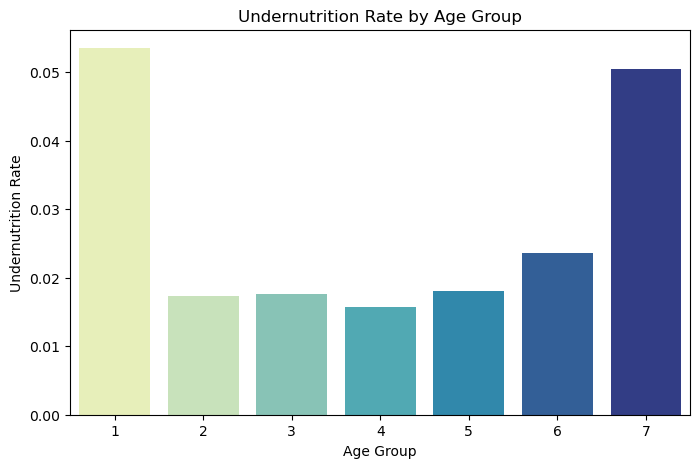

In [134]:
age_rate = df_small.groupby('age_group')['undernourished'].mean()
print(age_rate)

plt.figure(figsize=(8,5))
sns.barplot(x=age_rate.index, y=age_rate.values, palette='YlGnBu')
plt.ylabel('Undernutrition Rate')
plt.xlabel('Age Group')
plt.title('Undernutrition Rate by Age Group')
plt.show()

wealth_index
1    0.036920
2    0.036941
3    0.029162
4    0.027393
5    0.016905
Name: undernourished, dtype: float64


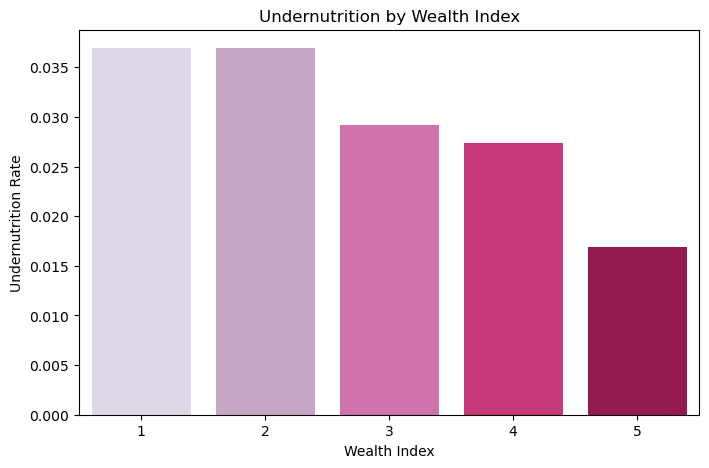

In [135]:
# By Wealth Index
wealth_rate = df_small.groupby('wealth_index')['undernourished'].mean()
print(wealth_rate)

plt.figure(figsize=(8,5))
sns.barplot(x=wealth_rate.index, y=wealth_rate.values, palette='PuRd')
plt.xlabel('Wealth Index')
plt.ylabel('Undernutrition Rate')
plt.title('Undernutrition by Wealth Index')
plt.show()

education_level
0    0.033284
1    0.027412
2    0.031630
3    0.020833
Name: undernourished, dtype: float64


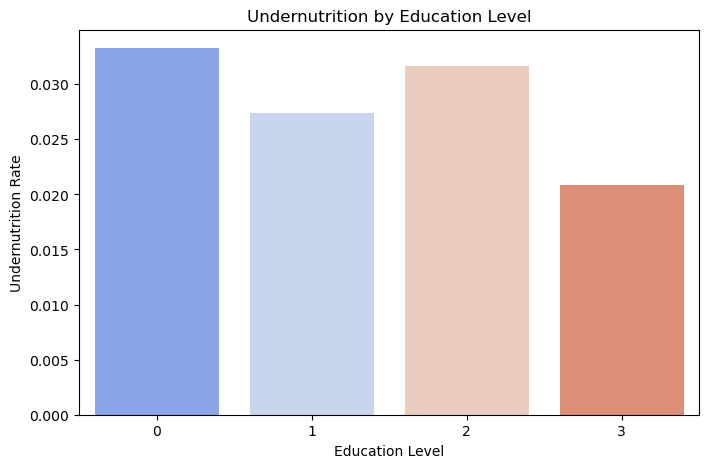

In [136]:
# By Education Level
edu_rate = df_small.groupby('education_level')['undernourished'].mean()
print(edu_rate)

plt.figure(figsize=(8,5))
sns.barplot(x=edu_rate.index, y=edu_rate.values, palette='coolwarm')
plt.xlabel('Education Level')
plt.ylabel('Undernutrition Rate')
plt.title('Undernutrition by Education Level')
plt.show()

residence
1    0.019431
2    0.031851
Name: undernourished, dtype: float64


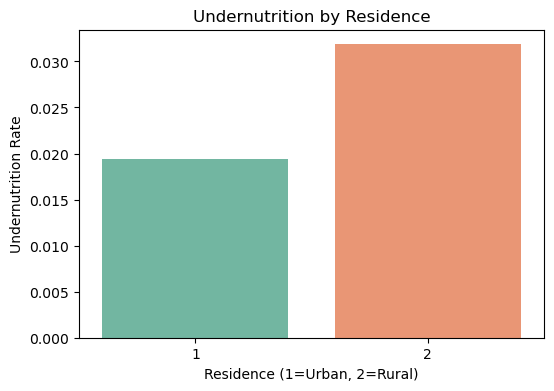

In [137]:
# By Residence (1=Urban, 2=Rural)
res_rate = df_small.groupby('residence')['undernourished'].mean()
print(res_rate)

plt.figure(figsize=(6,4))
sns.barplot(x=res_rate.index, y=res_rate.values, palette='Set2')
plt.xlabel('Residence (1=Urban, 2=Rural)')
plt.ylabel('Undernutrition Rate')
plt.title('Undernutrition by Residence')
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


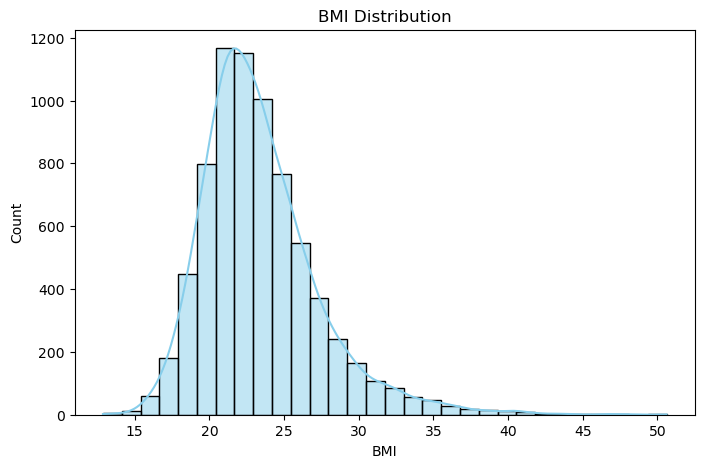

In [138]:
#BMI distribution analysis
plt.figure(figsize=(8,5))
sns.histplot(df_small['bmi'], bins=30, kde=True, color='skyblue')
plt.xlabel('BMI')
plt.title('BMI Distribution')
plt.show()


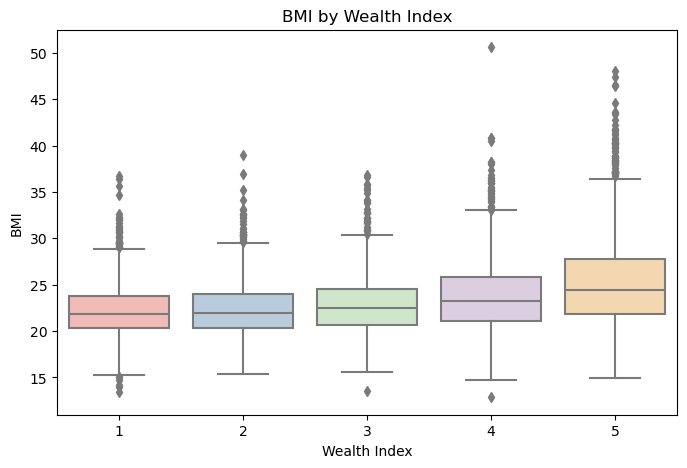

In [139]:
# Boxplot of BMI by wealth index
plt.figure(figsize=(8,5))
sns.boxplot(x='wealth_index', y='bmi', data=df_small, palette='Pastel1')
plt.xlabel('Wealth Index')
plt.ylabel('BMI')
plt.title('BMI by Wealth Index')
plt.show()

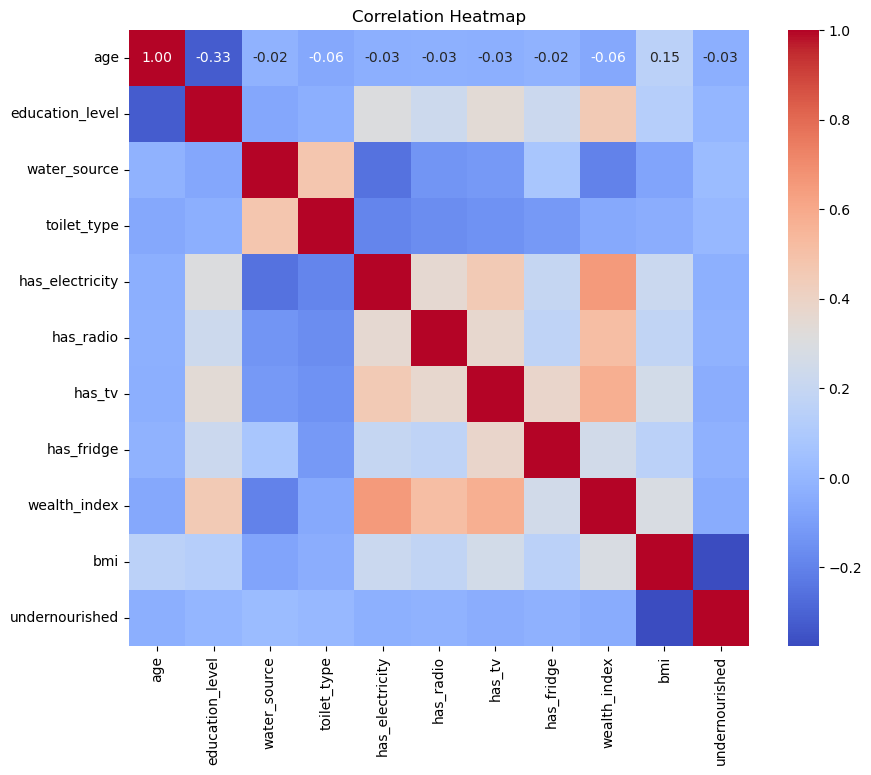

In [140]:
# 7. Correlation heatmap (numeric columns)
# -------------------------------
numeric_cols = ['age', 'education_level', 'water_source', 'toilet_type', 
                'has_electricity', 'has_radio', 'has_tv', 'has_fridge', 
                'wealth_index', 'bmi', 'undernourished']

plt.figure(figsize=(10,8))
sns.heatmap(df_small[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

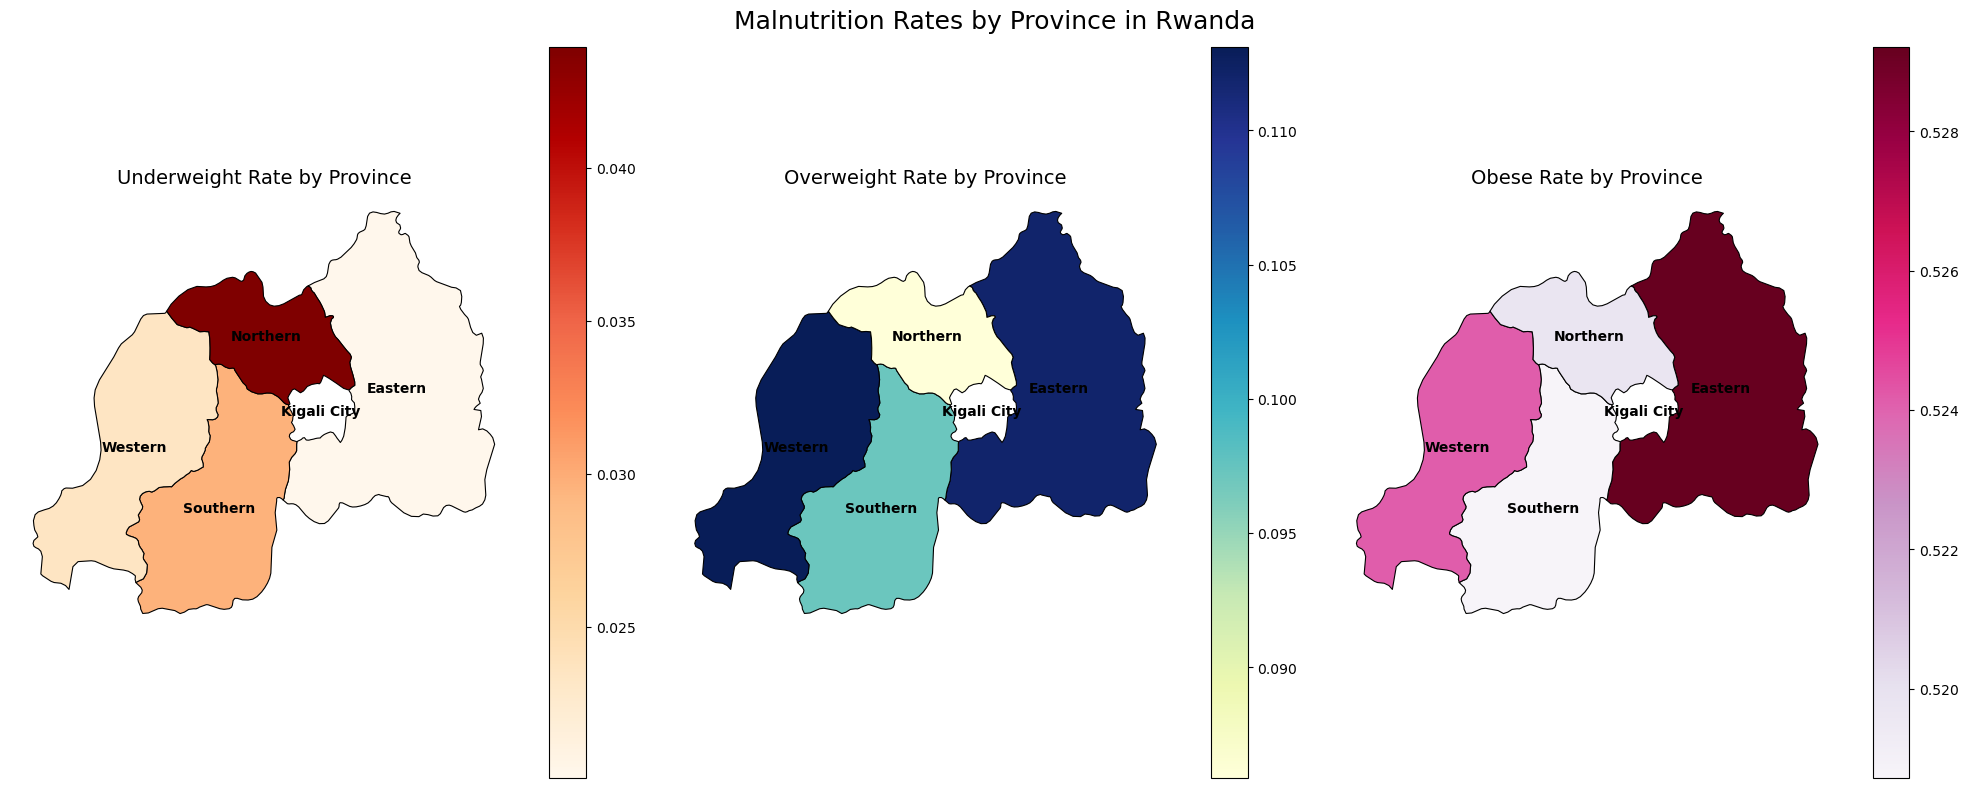

In [142]:
import matplotlib.pyplot as plt

# -------------------------------
# 1. Prepare figure
# -------------------------------
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Categories to plot
categories = ['underweight_rate', 'overweight_rate', 'obese_rate']
titles = ['Underweight', 'Overweight', 'Obese']
cmap = ['OrRd', 'YlGnBu', 'PuRd']

for i, category in enumerate(categories):
    gdf.plot(column=category, ax=axes[i], legend=True,
             cmap=cmap[i], edgecolor='black', linewidth=0.8)
    
    # Add province labels
    for idx, row in gdf.iterrows():
        axes[i].text(row['centroid'].x, row['centroid'].y, row['name'],
                     fontsize=10, ha='center', va='center', fontweight='bold')
    
    axes[i].set_title(f'{titles[i]} Rate by Province', fontsize=14)
    axes[i].axis('off')

plt.suptitle('Malnutrition Rates by Province in Rwanda', fontsize=18)
plt.tight_layout()
plt.show()


In [143]:
# -------------------------------
# 1. Import libraries
# -------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# -------------------------------
# 2. Define BMI-based malnutrition status
# -------------------------------
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df_small = df_small.dropna(subset=['bmi'])  # drop rows where BMI is missing (~50%)
df_small['malnutrition_status'] = df_small['bmi'].apply(bmi_category)

# -------------------------------
# 3. Select features and target
# -------------------------------
features = ['age', 'age_group', 'region', 'residence', 'education_level',
            'water_source', 'toilet_type', 'has_electricity', 'has_radio',
            'has_tv', 'has_fridge', 'wealth_index']

X = df_small[features]
y = df_small['malnutrition_status']

# -------------------------------
# 4. Encode categorical features
# -------------------------------
categorical_features = ['region', 'residence', 'water_source', 'toilet_type']
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# -------------------------------
# 5. Train/Test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------------
# 6. Train Random Forest Classifier
# -------------------------------
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# -------------------------------
# 7. Evaluate model
# -------------------------------
y_pred = rf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

# -------------------------------
# 8. Feature importance
# -------------------------------
importances = pd.Series(rf.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)
print("\nTop 10 Important Features:")
print(importances.head(10))


C:\Users\user\AppData\Local\Temp\ipykernel_8452\99952572.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['malnutrition_status'] = df_small['bmi'].apply(bmi_category)


Confusion Matrix:
[[852  15  93  19]
 [ 55  10  22   0]
 [243  17  46   3]
 [ 79   0   5   1]]

Classification Report:
              precision    recall  f1-score   support

      Normal      0.693     0.870     0.772       979
       Obese      0.238     0.115     0.155        87
  Overweight      0.277     0.149     0.194       309
 Underweight      0.043     0.012     0.019        85

    accuracy                          0.623      1460
   macro avg      0.313     0.286     0.285      1460
weighted avg      0.540     0.623     0.569      1460


Top 10 Important Features:
age                0.278212
age_group          0.097044
wealth_index       0.092579
education_level    0.082387
has_radio          0.038200
residence_2        0.030628
region_3           0.029115
has_electricity    0.028989
region_5           0.028613
toilet_type_22     0.027684
dtype: float64


In [151]:
# -------------------------------
# 9. Save the trained model
# -------------------------------
import joblib

# Save the model as a .pkl file
joblib.dump(rf, "malnutrition_model.pkl")
print("✅ Model saved as malnutrition_model.pkl")


✅ Model saved as malnutrition_model.pkl
